In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from nltk import ngrams
from itertools import chain
from wordcloud import WordCloud
from fractions import Fraction
import re
import json
from pandas import DataFrame
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import  TfidfTransformer
from wordcloud import WordCloud, STOPWORDS

In [6]:
#reading the dataset

#read mobile dataset
reviews_df = pd.read_json('reviews_Cell_Phones_and_Accessories_5.json', lines=True)

In [7]:
#Exploring reviews_df
reviews_df.head(10)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,120401325X,"[0, 0]",4,They look good and stick good! I just don't li...,"05 21, 2014",A30TL5EWN6DFXT,christina,Looks Good,1400630400
1,120401325X,"[0, 0]",5,These stickers work like the review says they ...,"01 14, 2014",ASY55RVNIL0UD,emily l.,Really great product.,1389657600
2,120401325X,"[0, 0]",5,These are awesome and make my phone look so st...,"06 26, 2014",A2TMXE2AFO7ONB,Erica,LOVE LOVE LOVE,1403740800
3,120401325X,"[4, 4]",4,Item arrived in great time and was in perfect ...,"10 21, 2013",AWJ0WZQYMYFQ4,JM,Cute!,1382313600
4,120401325X,"[2, 3]",5,"awesome! stays on, and looks great. can be use...","02 3, 2013",ATX7CZYFXI1KW,patrice m rogoza,leopard home button sticker for iphone 4s,1359849600
5,120401325X,"[1, 2]",3,These make using the home button easy. My daug...,"10 12, 2013",APX47D16JOP7H,RLH,Cute,1381536000
6,120401325X,"[0, 0]",5,Came just as described.. It doesn't come unstu...,"08 22, 2013",A1JVVYYO7G56DS,Tyler Evans,best thing ever..,1377129600
7,3998899561,"[1, 2]",1,it worked for the first week then it only char...,"11 21, 2013",A6FGO4TBZ3QFZ,Abdullah Albyati,not a good Idea,1384992000
8,3998899561,"[2, 3]",5,"Good case, solid build. Protects phone all aro...","09 25, 2013",A2JWEDW5FSVB0F,Adam,Solid Case,1380067200
9,3998899561,"[1, 1]",5,This is a fantastic case. Very stylish and pro...,"04 3, 2014",A8AJS1DW7L3JJ,Agata Majchrzak,Perfect Case,1396483200


In [15]:
#we will genrate the HelpfulnessNumerator, HelpfulnessDenominator by heplful column
reviews_df[['HelpfulnessNumerator','HelpfulnessDenominator']] = pd.DataFrame(reviews_df.helpful.values.tolist(), index = reviews_df.index)
reviews_df

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,HelpfulnessNumerator,HelpfulnessDenominator,Helpful %,% Upvote,Id
0,120401325X,"[0, 0]",4,They look good and stick good! I just don't li...,"05 21, 2014",A30TL5EWN6DFXT,christina,Looks Good,1400630400,0,0,-1.000000,Empty,0
1,120401325X,"[0, 0]",5,These stickers work like the review says they ...,"01 14, 2014",ASY55RVNIL0UD,emily l.,Really great product.,1389657600,0,0,-1.000000,Empty,1
2,120401325X,"[0, 0]",5,These are awesome and make my phone look so st...,"06 26, 2014",A2TMXE2AFO7ONB,Erica,LOVE LOVE LOVE,1403740800,0,0,-1.000000,Empty,2
3,120401325X,"[4, 4]",4,Item arrived in great time and was in perfect ...,"10 21, 2013",AWJ0WZQYMYFQ4,JM,Cute!,1382313600,4,4,1.000000,80-100%,3
4,120401325X,"[2, 3]",5,"awesome! stays on, and looks great. can be use...","02 3, 2013",ATX7CZYFXI1KW,patrice m rogoza,leopard home button sticker for iphone 4s,1359849600,2,3,0.666667,60-80%,4
5,120401325X,"[1, 2]",3,These make using the home button easy. My daug...,"10 12, 2013",APX47D16JOP7H,RLH,Cute,1381536000,1,2,0.500000,40-60%,5
6,120401325X,"[0, 0]",5,Came just as described.. It doesn't come unstu...,"08 22, 2013",A1JVVYYO7G56DS,Tyler Evans,best thing ever..,1377129600,0,0,-1.000000,Empty,6
7,3998899561,"[1, 2]",1,it worked for the first week then it only char...,"11 21, 2013",A6FGO4TBZ3QFZ,Abdullah Albyati,not a good Idea,1384992000,1,2,0.500000,40-60%,7
8,3998899561,"[2, 3]",5,"Good case, solid build. Protects phone all aro...","09 25, 2013",A2JWEDW5FSVB0F,Adam,Solid Case,1380067200,2,3,0.666667,60-80%,8
9,3998899561,"[1, 1]",5,This is a fantastic case. Very stylish and pro...,"04 3, 2014",A8AJS1DW7L3JJ,Agata Majchrzak,Perfect Case,1396483200,1,1,1.000000,80-100%,9


198502 rows × 11 columns
We will clean the data by dropping the duplicate entries based on reviewerID asin and unixReviewTime. Then we will add the helpfulness and upvote percentages. If the helpfulness denominator < 0, we will assign it helpful % of -1, else will take helpfulnessNumerator / helpfulnessDenominator and assign it a range in % upvote.

In [16]:
#Cleaning the data by eliminating duplicates
reviews_df.drop_duplicates(subset=['reviewerID', 'asin','unixReviewTime'],inplace=True)

#Adding the helpfulness and upvote percentages for metrics
reviews_df['Helpful %'] = np.where(reviews_df['HelpfulnessDenominator'] > 0, reviews_df['HelpfulnessNumerator'] / reviews_df['HelpfulnessDenominator'], -1)
reviews_df['% Upvote'] = pd.cut(reviews_df['Helpful %'], bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'], include_lowest = True)
reviews_df['Id'] = reviews_df.index;
reviews_df

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,HelpfulnessNumerator,HelpfulnessDenominator,Helpful %,% Upvote,Id
0,120401325X,"[0, 0]",4,They look good and stick good! I just don't li...,"05 21, 2014",A30TL5EWN6DFXT,christina,Looks Good,1400630400,0,0,-1.000000,Empty,0
1,120401325X,"[0, 0]",5,These stickers work like the review says they ...,"01 14, 2014",ASY55RVNIL0UD,emily l.,Really great product.,1389657600,0,0,-1.000000,Empty,1
2,120401325X,"[0, 0]",5,These are awesome and make my phone look so st...,"06 26, 2014",A2TMXE2AFO7ONB,Erica,LOVE LOVE LOVE,1403740800,0,0,-1.000000,Empty,2
3,120401325X,"[4, 4]",4,Item arrived in great time and was in perfect ...,"10 21, 2013",AWJ0WZQYMYFQ4,JM,Cute!,1382313600,4,4,1.000000,80-100%,3
4,120401325X,"[2, 3]",5,"awesome! stays on, and looks great. can be use...","02 3, 2013",ATX7CZYFXI1KW,patrice m rogoza,leopard home button sticker for iphone 4s,1359849600,2,3,0.666667,60-80%,4
5,120401325X,"[1, 2]",3,These make using the home button easy. My daug...,"10 12, 2013",APX47D16JOP7H,RLH,Cute,1381536000,1,2,0.500000,40-60%,5
6,120401325X,"[0, 0]",5,Came just as described.. It doesn't come unstu...,"08 22, 2013",A1JVVYYO7G56DS,Tyler Evans,best thing ever..,1377129600,0,0,-1.000000,Empty,6
7,3998899561,"[1, 2]",1,it worked for the first week then it only char...,"11 21, 2013",A6FGO4TBZ3QFZ,Abdullah Albyati,not a good Idea,1384992000,1,2,0.500000,40-60%,7
8,3998899561,"[2, 3]",5,"Good case, solid build. Protects phone all aro...","09 25, 2013",A2JWEDW5FSVB0F,Adam,Solid Case,1380067200,2,3,0.666667,60-80%,8
9,3998899561,"[1, 1]",5,This is a fantastic case. Very stylish and pro...,"04 3, 2014",A8AJS1DW7L3JJ,Agata Majchrzak,Perfect Case,1396483200,1,1,1.000000,80-100%,9


Getting the sentiments based on overall review score

In [18]:
#Creating positive and negative columns based on overall review score
reviews_df["sentiment"] = reviews_df["overall"].apply(lambda score: "positive" if score > 3 else "negative")
reviews_df.head(5)

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,HelpfulnessNumerator,HelpfulnessDenominator,Helpful %,% Upvote,Id,sentiment
0,120401325X,"[0, 0]",4,They look good and stick good! I just don't li...,"05 21, 2014",A30TL5EWN6DFXT,christina,Looks Good,1400630400,0,0,-1.000000,Empty,0,positive
1,120401325X,"[0, 0]",5,These stickers work like the review says they ...,"01 14, 2014",ASY55RVNIL0UD,emily l.,Really great product.,1389657600,0,0,-1.000000,Empty,1,positive
2,120401325X,"[0, 0]",5,These are awesome and make my phone look so st...,"06 26, 2014",A2TMXE2AFO7ONB,Erica,LOVE LOVE LOVE,1403740800,0,0,-1.000000,Empty,2,positive
3,120401325X,"[4, 4]",4,Item arrived in great time and was in perfect ...,"10 21, 2013",AWJ0WZQYMYFQ4,JM,Cute!,1382313600,4,4,1.000000,80-100%,3,positive
4,120401325X,"[2, 3]",5,"awesome! stays on, and looks great. can be use...","02 3, 2013",ATX7CZYFXI1KW,patrice m rogoza,leopard home button sticker for iphone 4s,1359849600,2,3,0.666667,60-80%,4,positive


Exploratory Data Analysis(EDA)
Lets make a heatmap of % upvote and overall

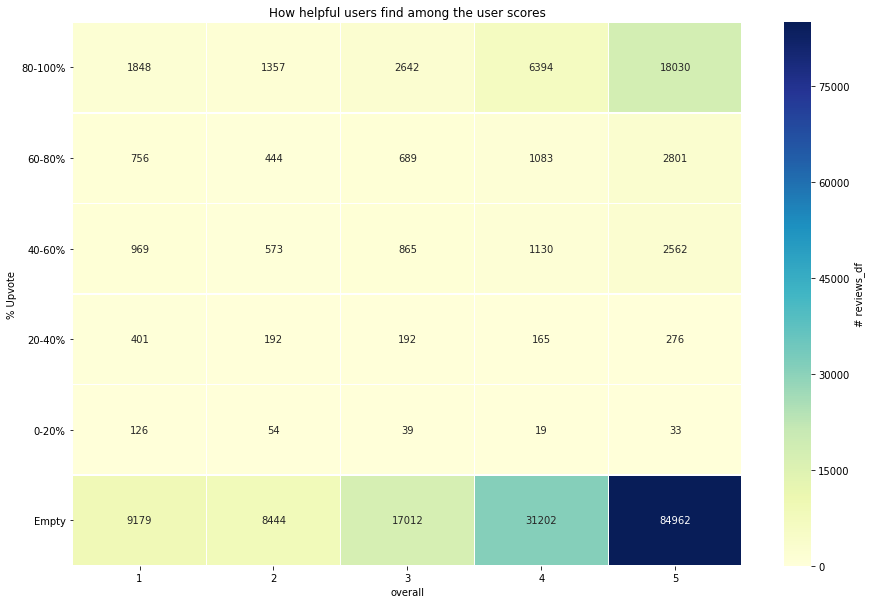

In [20]:
#getting heatmap on overall rating and reviews
df_review = reviews_df.groupby(['overall', '% Upvote']).agg({'Id': 'count'})
df_review = df_review.unstack()
df_review.columns = df_review.columns.get_level_values(1)
fig = plt.figure(figsize=(15,10))

sns.heatmap(df_s[df_s.columns[::-1]].T, cmap = 'YlGnBu', linewidths=.5, annot = True, fmt = 'd', cbar_kws={'label': '# reviews_df'})
plt.yticks(rotation=0)
plt.title('How helpful users find among the user scores')
plt.show()

Based on the heatmap, we can see that there are users that have given overall = 3, this is a neutral review. Therefore, we will now remove the neutral reviews adn assign value to 1 to reviews with overall < 3 as 0 and overall > 3 as 1. This will help us in performing regression.

In [23]:
df_review =  reviews_df[reviews_df['overall'] != 3]
X = df_review['reviewText']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = df_review['overall'].map(y_dict)

Performing logistic regression:
We will now perform logistic regression. The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary. We will create test train model and sort the words based. Stop words are words like “and”, “the”, “him”, which are presumed to be uninformative in representing the content of a text, and which may be removed to avoid them being construed as signal for prediction. Sometimes, however, similar words are useful for prediction, such as in classifying writing style or personality.
Getting the top 20 negatives and positive words from reviews

In [24]:
cv = CountVectorizer(stop_words = 'english')

def text_fit(X, y, model,clf_model,coef_show=1):
    
    X_cv = model.fit_transform(X)
    print('# features: {}'.format(X_cv.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_cv, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    
    
text_fit(X, y, cv, LogisticRegression())

# features: 80572
# train records: 129750
# test records: 43250


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracy: 0.9227514450867053

-Top 20 positive-
        Word  Coefficient
       loves     2.364176
 compliments     2.240307
       charm     1.975934
       saved     1.973806
        beat     1.735253
      highly     1.727258
   complaint     1.724389
  pleasantly     1.692454
   excellent     1.649112
        love     1.616598
       steal     1.495543
       worry     1.465551
  minimalist     1.461322
      affect     1.448213
       likes     1.442931
    hesitate     1.432604
   perfectly     1.417806
       blown     1.417763
       grabs     1.417588
   skeptical     1.412744

-Top 20 negative-
           Word  Coefficient
 disappointment    -1.777186
        stopped    -1.786942
          false    -1.790931
         faulty    -1.809802
          trash    -1.810044
   unacceptable    -1.836959
           poor    -1.864432
           quit    -1.874338
       unusable    -1.905581
        defeats    -1.913719
         poorly    -1.918794
      worthless    -1.969871
    

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Baseline accuracy of the model is as follows:
A baseline result is the simplest possible prediction. For some problems, this may be a random result, and in others in may be the most common prediction. DummyClassifier is a classifier that makes predictions using simple rules. This classifier is useful as a simple baseline to compare with other (real) classifiers

In [25]:
text_fit(X, y, cv, DummyClassifier(),0)

# features: 80572
# train records: 129750
# test records: 43250
Model Accuracy: 0.7580115606936416


Here we got Accuracy of model 0.780. To boost the accuracyWe will apply TF-IDF vectorizer to logistic regression to improve the model accuracy. It Transforms text to feature vectors that can be used as input to estimator. In will help us to convert each token (word) to feature index in the matrix, each unique token gets a feature index.
Tf-idf
Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.
One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.
Tf-idf can be successfully used for stop-words filtering in various subject fields including text summarization and classification.

In [26]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 80572
# train records: 129750
# test records: 43250
Model Accuracy: 0.9259653179190751

-Top 20 positive-
        Word  Coefficient
       great    10.458979
        love     9.996267
     perfect     7.938092
   perfectly     7.540568
   excellent     7.327426
      highly     6.708346
       loves     6.478910
       works     6.402494
        easy     6.156970
        best     5.937483
     awesome     5.747456
         job     5.347330
   complaint     5.017223
        nice     4.805633
 compliments     4.761000
    protects     4.699120
     exactly     4.657058
     amazing     4.653871
     pleased     4.608646
        good     4.577451

-Top 20 negative-
          Word  Coefficient
 unfortunately    -4.238080
       concept    -4.283389
       garbage    -4.765975
          junk    -4.884566
    impossible    -4.943530
         broke    -5.034052
 disappointing    -5.343385
        poorly    -5.413433
        refund    -5.506034
       stopped    -5.666841
      ter

In [27]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 80572
# train records: 129750
# test records: 43250
Model Accuracy: 0.9259653179190751

-Top 20 positive-
        Word  Coefficient
       great    10.458979
        love     9.996267
     perfect     7.938092
   perfectly     7.540568
   excellent     7.327426
      highly     6.708346
       loves     6.478910
       works     6.402494
        easy     6.156970
        best     5.937483
     awesome     5.747456
         job     5.347330
   complaint     5.017223
        nice     4.805633
 compliments     4.761000
    protects     4.699120
     exactly     4.657058
     amazing     4.653871
     pleased     4.608646
        good     4.577451

-Top 20 negative-
          Word  Coefficient
 unfortunately    -4.238080
       concept    -4.283389
       garbage    -4.765975
          junk    -4.884566
    impossible    -4.943530
         broke    -5.034052
 disappointing    -5.343385
        poorly    -5.413433
        refund    -5.506034
       stopped    -5.666841
      ter

Accuracy with tfidf has increased from 79.5 to 93.6. Logistic regression is now performed on TFIDF + n-grams. It can also be observed that words that don't indicate polarity of the sentiment are removed.
n-grams:
N-grams are contiguous sequences of n-items in a sentence. N can be 1, 2 or any other positive integers, although usually we do not consider very large N because those n-grams rarely appears in many different places.
When performing machine learning tasks related to natural language processing, we usually need to generate n-grams from input sentences. For example, in text classification tasks, in addition to using each individual token found in the corpus, we may want to add bi-grams or tri-grams as features to represent our documents. This post describes several different ways to generate n-grams quickly from input sentences in Python.

In [28]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
text_fit(X, y, tfidf_n, LogisticRegression())

# features: 2256450
# train records: 129750
# test records: 43250
Model Accuracy: 0.9206473988439307

-Top 20 positive-
      Word  Coefficient
     great    15.113384
      love    14.158896
   perfect    10.276112
     works     9.538884
      easy     8.937969
 perfectly     8.881491
 excellent     7.929255
      best     7.704342
      nice     7.497264
     loves     7.412977
      fits     6.849201
   awesome     6.810547
     price     6.559323
    little     6.171743
    highly     5.811522
      good     5.805764
       job     5.518528
   exactly     5.458656
       far     5.378804
       bit     5.287869

-Top 20 negative-
         Word  Coefficient
        tried    -5.490899
   impossible    -5.520951
       poorly    -5.659842
      started    -5.978339
         junk    -6.021297
        cheap    -6.065484
      stopped    -6.373978
     does fit    -6.384082
       refund    -6.588351
     terrible    -6.740348
     horrible    -7.371243
        worst    -7.448810
    re

It can be observed that accuracy of Logistic regression has not improved with n-grams. So, using n-grams did not help us much.
Study of user behavior
The user behavior has to be analyzed to improve the model performance and understand the underlying reasons for the bad or good reviews. This also gives importance to word choices of a user when giving the reviews. As, there aresome user who explictly rate product bad or good if it vice versa.

In [32]:
df_userreviews = reviews_df.groupby(['reviewerID']).agg({'overall':['count', 'mean']})
df_userreviews.columns = df_userreviews.columns.get_level_values(1)
df_userreviews.columns = ['Rating count', 'Rating mean']
df_userreviews = df_userreviews.sort_values(by = 'Rating count', ascending = False)
print(df_userreviews.head(10))

                Rating count  Rating mean
reviewerID                               
A2NYK9KWFMJV4Y           152     4.907895
A1EVV74UQYVKRY           138     4.731884
A22CW0ZHY3NJH8           138     4.471014
A1ODOGXEYECQQ8           134     4.313433
A2NOW4U7W3F7RI           132     4.765152
A36K2N527TXXJN           124     4.524194
A1UQBFCERIP7VJ           114     4.850877
A18U49406IPPIJ           109     4.944954
A1E1LEVQ9VQNK            109     4.935780
AYB4ELCS5AM8P            107     4.887850


Count of ratings is considered to select the user and user with the id A3KEZLJ59C1JVH is randomly chosen

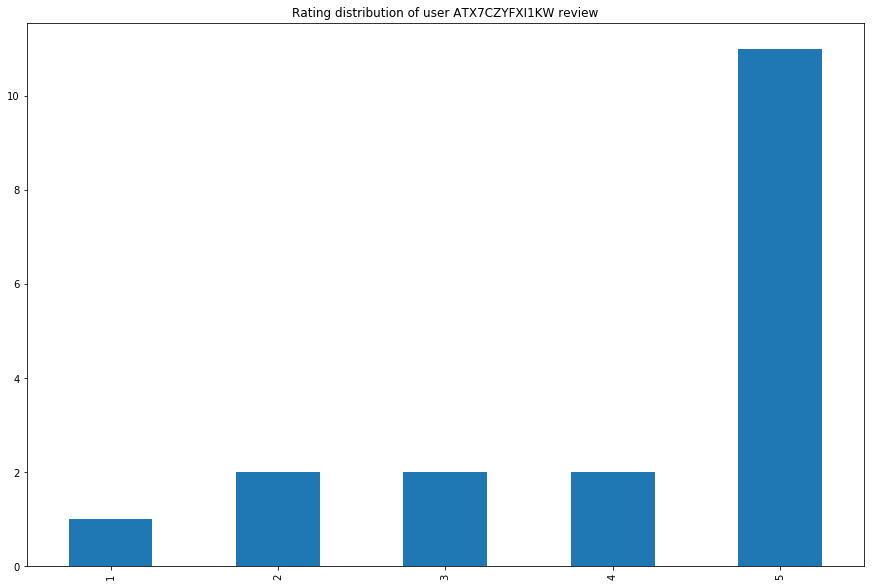

In [37]:
def plot_user(reviewerID):
    df_1user = reviews_df[reviews_df['reviewerID'] == reviewerID]['overall']
    df_1user_plot = df_1user.value_counts(sort=False)
    ax = df_1user_plot.plot(kind = 'bar', figsize = (15,10), title = 'Rating distribution of user {} review'.format(reviews_df[reviews_df['reviewerID'] == reviewerID]['reviewerID'].iloc[0]))
    plt.show()

#A3KEZLJ59C1JVH
plot_user('ATX7CZYFXI1KW')

It can be observed that the user is generous with his ratings and probably happy with his products as most of his ratings are 5. This gives us idea about user behavioral aspetcs.

In [38]:
print(df_userreviews[(df_userreviews['Rating mean']<3.5) & (df_userreviews['Rating mean']>2.5)].head())

                Rating count  Rating mean
reviewerID                               
A3LDPF5FMB782Z            39     3.435897
A2QRXQPHDMFCQV            28     3.214286
A1KRF81GTI2KKT            27     2.814815
A1F9Z42CFF9IAY            27     3.074074
A3PDNN5MJF9ZJ0            27     3.481481


Now, one of the users with mean rating near 3 (A3LDPF5FMB782Z) is chosen to perform the analysis

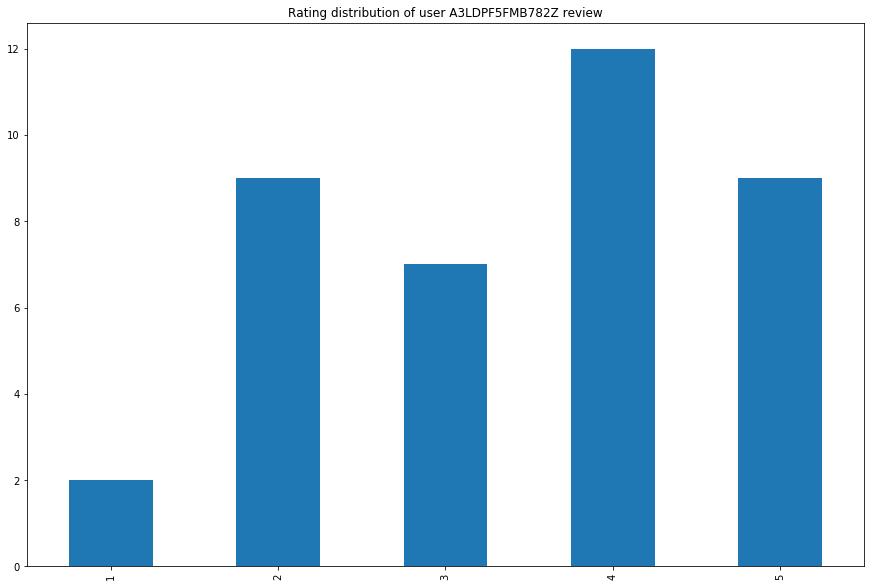

In [62]:
plot_user('A3LDPF5FMB782Z')

This have given rating of 4 or 5 to the most of products. As, we can sse that this user is not always satisfied with Products.
Most popular words used by the user for different ratings are observed. (2-grams and 3-grams are chosen for analysis) Here, we will analyzed the most pouplar words used by th user. An N-gram is simply a sequence of N words. For instance, let us take a look at the following examples.
San Francisco (is a 2-gram)
The Three Musketeers (is a 3-gram)
She stood up slowly (is a 4-gram)
N-gram model predicts the occurrence of a word based on the occurrence of its N – 1 previous words. So here we are answering the question – how far back in the history of a sequence of words should we go to predict the next word? For instance, a bigram model (N = 2) predicts the occurrence of a word given only its previous word (as N – 1 = 1 in this case). Similarly, a trigram model (N = 3) predicts the occurrence of a word based on its previous two words (as N – 1 = 2 in this case).

In [69]:

def get_token_ngram(score, benchmark, userid='all'):
    '''This functions returns the top used words by the user  we have applied nltk word_tokenize to split the 
       sentence or text  into the words and then we will take that in total text if that word are not in stop word and 
       len is >=3 and apply bigrams and trigrams.  
        '''

    if userid != 'all':
        df = reviews_df[(reviews_df['reviewerID'] == userid) & (reviews_df['overall'] == score)]['reviewText']
    else:
        df = reviews_df[reviews_df['overall'] == score]['reviewText']
        
    count = len(df)
    total_text = ' '.join(df)
    total_text = total_text.lower()
    stop = set(stopwords.words('english'))
    total_text = nltk.word_tokenize(total_text)
    total_text = [word for word in total_text if word not in stop and len(word) >= 3]
    lemmatizer = WordNetLemmatizer()
    total_text = [lemmatizer.lemmatize(w,'v') for w in total_text]
    bigrams = ngrams(total_text,2)
    trigrams = ngrams(total_text, 3)

    # look at 2-gram and 3-gram together
    combine = chain(bigrams, trigrams)
    text = nltk.Text(combine)
    fdist = nltk.FreqDist(text)
    
    # return only phrase occurs more than benchmark of his reviews
    return sorted([(w,fdist[w],str(round(fdist[w]/count*100,2))+'%') for w in set(text) if fdist[w] >= count*benchmark], key=lambda x: -x[1])



In [72]:
# score 1-5 reviews with this user
index = ['Phrase', 'Count', 'Occur %']

for j in range(1,6):
    test = pd.DataFrame()
    d = get_token_ngram(j, 0.25, 'A3LDPF5FMB782Z')
    print('score {} reviews most popular 2-gram / 3-gram:'.format(j))
    for i in d:
        test = test.append(pd.Series(i, index = index), ignore_index = True)
    print(test)

score 1 reviews most popular 2-gram / 3-gram:
     Count Occur %                           Phrase
0      2.0  100.0%                    (high, speed)
1      2.0  100.0%                     (speed, lte)
2      2.0  100.0%               (high, speed, lte)
3      1.0   50.0%                   (remove, zagg)
4      1.0   50.0%        (headaches, store, staff)
5      1.0   50.0%              (sprint/boost, new)
6      1.0   50.0%                     (2011, good)
7      1.0   50.0%                   (smooth, feel)
8      1.0   50.0%              (seem, foggy, hazy)
9      1.0   50.0%                 (staff, install)
10     1.0   50.0%                (look, new, 2013)
11     1.0   50.0%                   (screen, coat)
12     1.0   50.0%            (clear, sticky, feel)
13     1.0   50.0%              (run, sprint/boost)
14     1.0   50.0%             (speeds.as, october)
15     1.0   50.0%                (slow, speeds.as)
16     1.0   50.0%          (october, 2013, anyone)
17     1.0   50.0%

Here for user "A3LDPF5FMB782Z" we the count of words what he have used to int the reviews given by him. We see that this user has rating the reviews mostly postive as we can see that he have mostly used the good and plesent words.
Sentiment analysis is performed using logistic regression. The usage of non-contextual features in reviews is observed. Also, the user behavior is analyzed and the popular words used by the users are determined.

Conculsion:
By applying logistic regression on text review and overall review and using count vectorizer to tokenize the reviews,
we were able to generate a test train model and get top 20 positive and negative words from the reviews. 
We got the baseline accuracy of 0.78. After applying TF-IDF vectorizer to logistic regression, we were 
able to improve the accuracy to 0.92. We have also implemented n-grams + TFIDF which gave us a similar accuracy
of 0.92.The second algorithm that we tried was naïve bayes. The Naive Bayes algorithm is an intuitive method that 
uses the probabilities of each attribute belonging to each class to make a prediction. We used Multinomial and 
bernouli’s theorems to generate model for positive and negative sentiments and also predicted weather the review 
is positive or negative.We have also studied user’s behavior by taking a random user and the mean of his ratings. 
The user that we randomly chose appears to be really happy with the products and is biased towards giving good reviews.
Results for logistic regression were better of the two algorithms that we used as the models were more accurate.
Below is the comparison for all the scores that we obtained by implemeting different algorithms.

Logistic Regression -
Model Accuracy: 0.7825662672476398

Logistic Regression with TFIDF -
Model Accuracy: 0.9281726579520697

Logistic Regression with TFIDF + ngrams -
Model Accuracy: 0.9222267610748003

By the above data, we can say that logistic regression with TFIDF performs the best on our dataset.
